# MIND Dataset Analyze

데이터셋의 각종 정보를 확인하기 위한 파일입니다.

title, abstract의 길이 분포, 각 category 별 뉴스 수,
총 유저 수, 총 뉴스 수, top 10 view 뉴스 종류, timestamp 분포도 등을 직접 분석해 봅니다.

In [1]:
# jupyter notebook에서 import 해서 쓰는 모듈의 코드가 변경될 시, 변동 사항을 자동으로 반영해주는 기능 켜기
%load_ext autoreload
%autoreload 2

## 0. 기본 세팅

In [2]:
import os
from os import path
import sys

DATASET_SIZE = "demo"
PROJECT_DIR = path.abspath(path.join(os.getcwd(), "..", ".."))
DATASET_DIR = path.join(PROJECT_DIR, "data", "MIND", DATASET_SIZE)

sys.path.append(PROJECT_DIR)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_behaviors_path = path.join(DATASET_DIR, "train", "behaviors.tsv")
test_behaviors_path = path.join(DATASET_DIR, "test", "behaviors.tsv")
train_news_path = path.join(DATASET_DIR, "train", "news.tsv")
test_news_path = path.join(DATASET_DIR, "test", "news.tsv")

## 1. 데이터 불러오기

In [4]:
train_news_df = pd.read_csv(train_news_path, sep='\t', header=None, names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"])
train_behaviors_df = pd.read_csv(train_behaviors_path, sep='\t', header=None, names=["imp_id", "user_id", "time", "history", "impressions"])

In [6]:
train_news_df.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N3112,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://www.msn.com/en-us/lifestyle/lifestyler...,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N10399,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://www.msn.com/en-us/news/world/the-cost-...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
2,N12103,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://www.msn.com/en-us/health/voices/i-was-...,[],"[{""Label"": ""National Basketball Association"", ..."
3,N20460,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://www.msn.com/en-us/health/medical/how-t...,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
4,N5409,weather,weathertopstories,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,https://www.msn.com/en-us/weather/weathertopst...,"[{""Label"": ""Orlando, Florida"", ""Type"": ""G"", ""W...","[{""Label"": ""Orlando, Florida"", ""Type"": ""G"", ""W..."


In [7]:
train_behaviors_df.head()

,imp_id,user_id,time,history,impressions
0,1,U82271,11/11/2019 3:28:58 PM,N3130 N11621 N12917 N4574 N12140 N9748,N13390-0 N7180-0 N20785-0 N6937-0 N15776-0 N25...
1,2,U84185,11/12/2019 10:36:47 AM,N27209 N11723 N4617 N12320 N11333 N24461 N2211...,N13089-0 N18101-0 N1248-0 N26273-0 N12770-1 N1...
2,3,U11552,11/11/2019 1:03:52 PM,N2139,N18390-0 N10537-0 N23967-1
3,4,U68381,11/11/2019 6:44:05 AM,N27420 N11621 N25416 N25457 N5124 N11751 N1175...,N15660-0 N18609-0 N2831-0 N5677-0 N19010-0 N15...
4,5,U52303,11/12/2019 3:11:52 AM,N1332 N12667,N15645-0 N7911-1


In [62]:
train_behaviors_df.loc[train_behaviors_df["imp_id"] == 21826]

,imp_id,user_id,time,history,impressions
21825,21826,U89839,11/12/2019 11:06:32 AM,NaN,N9480-0 N2299-0 N26273-0 N1248-0 N1132-0 N1011...


## 2. 그래프 그려보기

In [94]:
from utils.MIND_analyzer import MINDAnalyzer

analyzer = MINDAnalyzer(dataset_size=DATASET_SIZE)

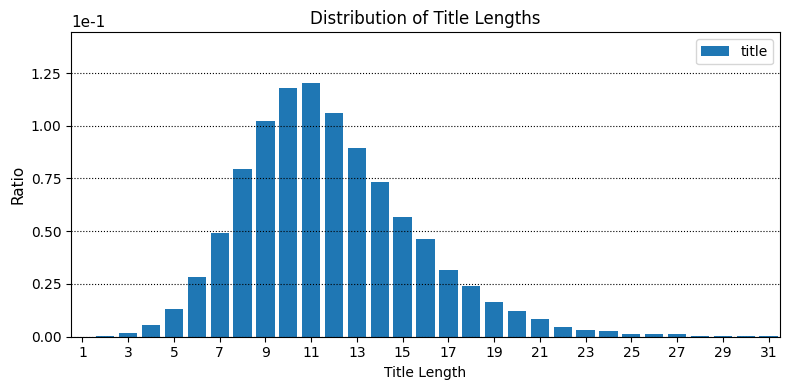

In [105]:
analyzer.show_title_len(is_token_len=True, size=(8, 4), range_x=(0, 31))

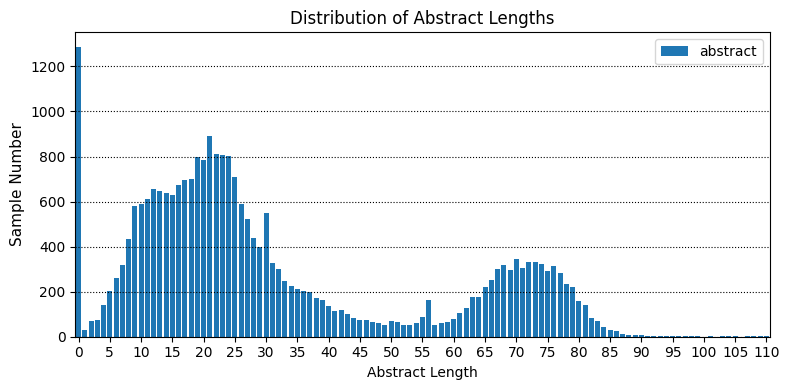

In [127]:
analyzer.show_abstract_len(is_token_len=False, is_remove_zero=False, size=(8, 4), range_x=(-1, 110))

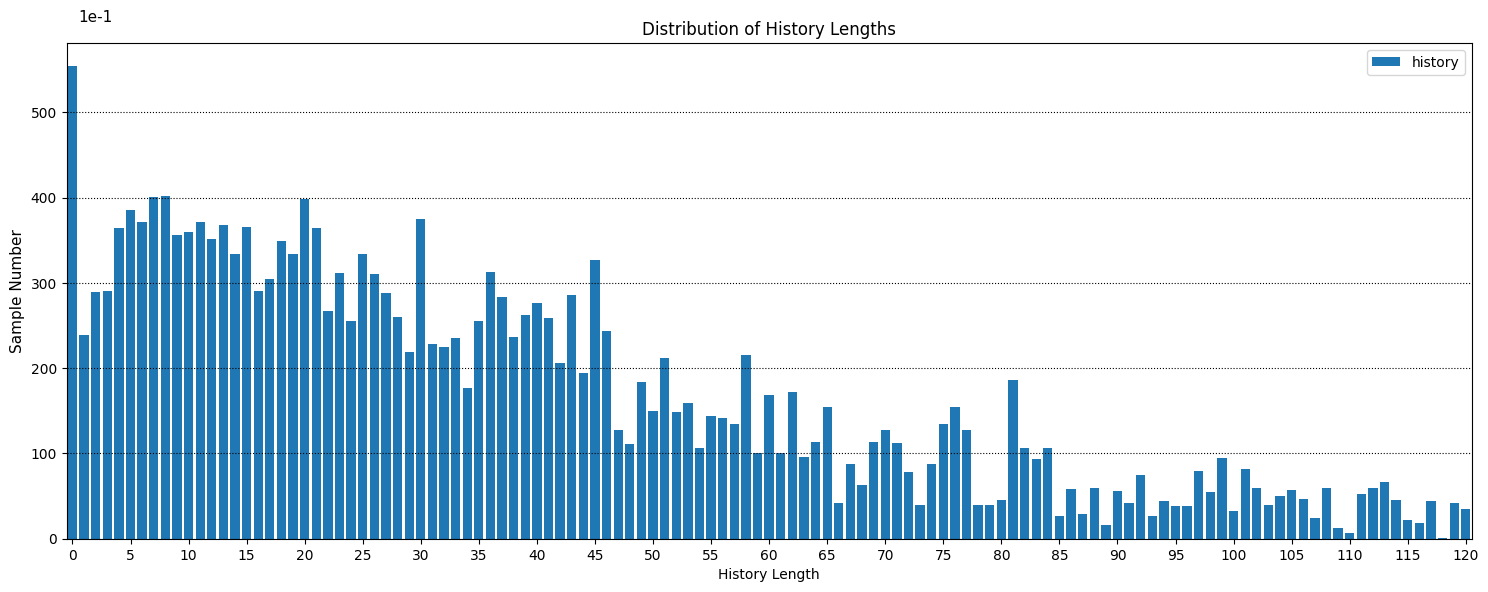

In [91]:
analyzer.show_history_len(size=(15, 6), range_x=(-1, 120))

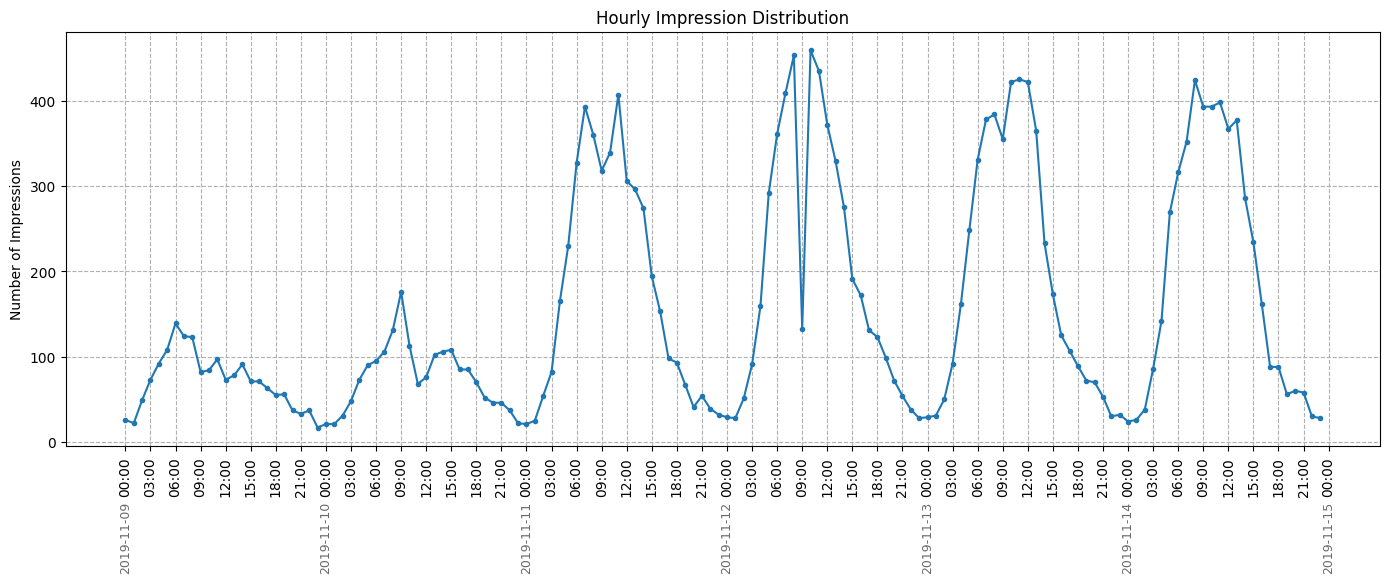

In [67]:
analyzer.show_impr_time_distribution()

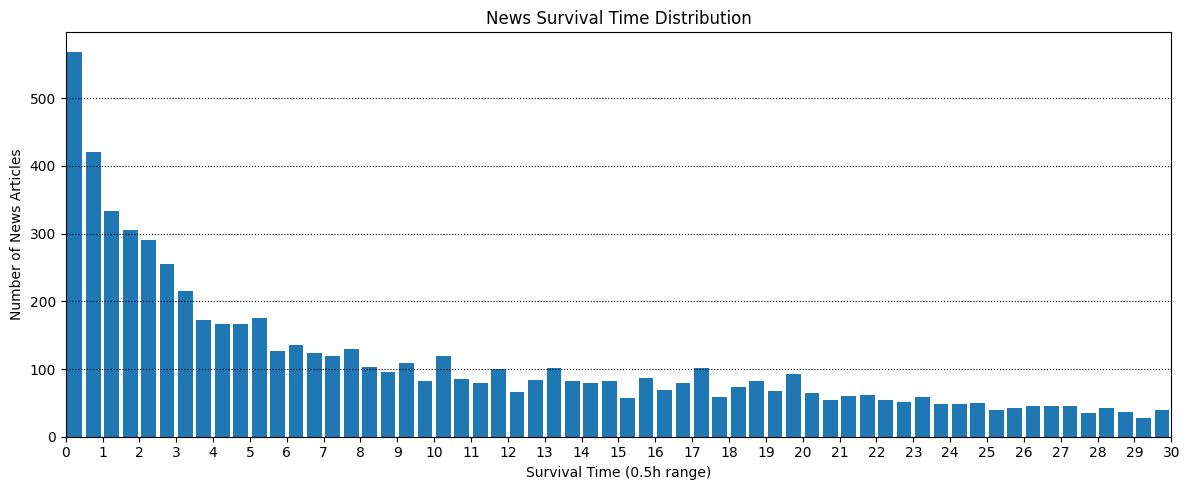

In [49]:
analyzer.show_survival_time()

## history 길이별 auc 평균치 확인

In [ ]:
from utils.model_manager import ModelManager
from utils.base_manager import ManagerArgs

In [ ]:
args = ManagerArgs(
    config_path = path.join(PROJECT_DIR, "config/model/nrms/exp_demo1.yaml"),
    test_ckpt_path = path.join(PROJECT_DIR, "logs/lightning_logs/checkpoints/nrms/exp_demo1/epoch=24-val_auc_epoch=0.6996.ckpt")
)

model_manager = ModelManager(PROJECT_DIR, args, "test")

In [ ]:
analyzer

## 3. 수치 확인하기

1. title의 token 길이가 20 이하인 뉴스는 전체 몇 %?
2. abstract의 token 길이가 50 이하인 뉴스는 전체 몇 %?
3. history의 뉴스 개수가 50개 이하인 뉴스는 전체 몇 %?